In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
# --- function to preprocess clim .in files


def read_cust_delim_file(file_path):
    # Read the first line to get column names using '/'
    with open(file_path) as file:
        columns = file.readline().strip().split(" / ")

    # Read the rest of the file using '\t' as the data delimiter
    df = pd.read_table(file_path, names=columns, delimiter="\t", skiprows=[0])

    # --- clean up column names
    # Remove "# " prefix from column headers
    df.columns = df.columns.str.replace("# ", "")
    # Replace parentheses with underscores
    df.columns = map(lambda x: x.replace("(", "_").replace(")", ""), df.columns)
    # replace "/" with underscores
    df.columns = map(lambda x: x.replace("/", "_"), df.columns)
    # remove leading or trailing spaces
    df.columns = df.columns.str.strip()
    # return
    return df

In [51]:
# --- read in data
fnvars = ["T", "q", "Wet"]
fnsuff = "_temp.in"

# loop through vars
df = pd.DataFrame()
for var in fnvars:
    thisvar = var + fnsuff
    dfi = read_cust_delim_file(thisvar)
    # bring together
    if var == fnvars[0]:
        df = dfi.copy()
    else:
        df = pd.merge(df, dfi, on="time_yr", how="outer")

df

,time_yr,T_C,runoff_mm_month,moisture_mm_m
0,0.000000,-14.118158,7.331076,348.818412
1,0.083333,-9.115721,36.386386,349.999180
2,0.166667,-7.199803,105.622162,359.231414
3,0.250000,4.684758,258.038904,378.908079
4,0.333333,15.202311,89.786018,337.040052
...,...,...,...,...
1027,85.583333,20.846833,64.552093,281.732984
1028,85.666667,12.410568,80.873501,305.494794
1029,85.750000,6.001521,85.516014,342.041358
1030,85.833333,-0.073304,107.668845,363.014079


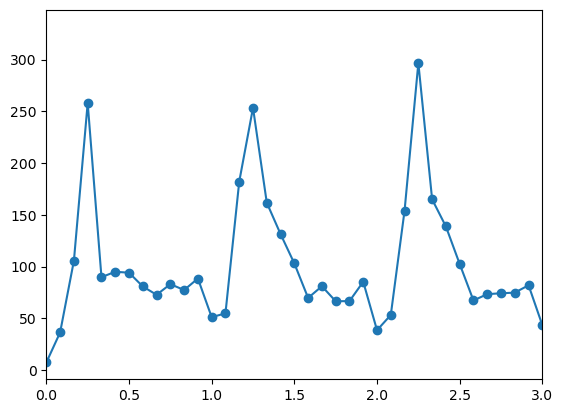

In [56]:
# --- quick plot, a few seasons
pvar = "runoff_mm_month"  # runoff_mm_month
# T_C
# moisture_mm_m

# plot
plt.plot(df["time_yr"], df[pvar])
plt.scatter(df["time_yr"], df[pvar])
plt.xlim([0, 3])
plt.show();

In [30]:
df.columns.str.strip()

Index(['time_yr', 'T_C'], dtype='object')